# Plots to help me understand the Goodman + Weare paper

https://msp.org/camcos/2010/5-1/camcos-v5-n1-p04-s.pdf

## Imports etc

In [28]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib as mpl

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
np.set_printoptions(linewidth=1000)

mpl.rcParams.update({
    "figure.dpi": 200,                    
    "font.size": 10,
    # Ticks
    "ytick.right": True,
    "ytick.direction": "in",
    "ytick.minor.visible": False,
    "xtick.top": True,
    "xtick.direction": "in",
    "xtick.minor.visible": False,
    "lines.linewidth" : 0.8,
    "lines.markersize" : 3,
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Eq 1

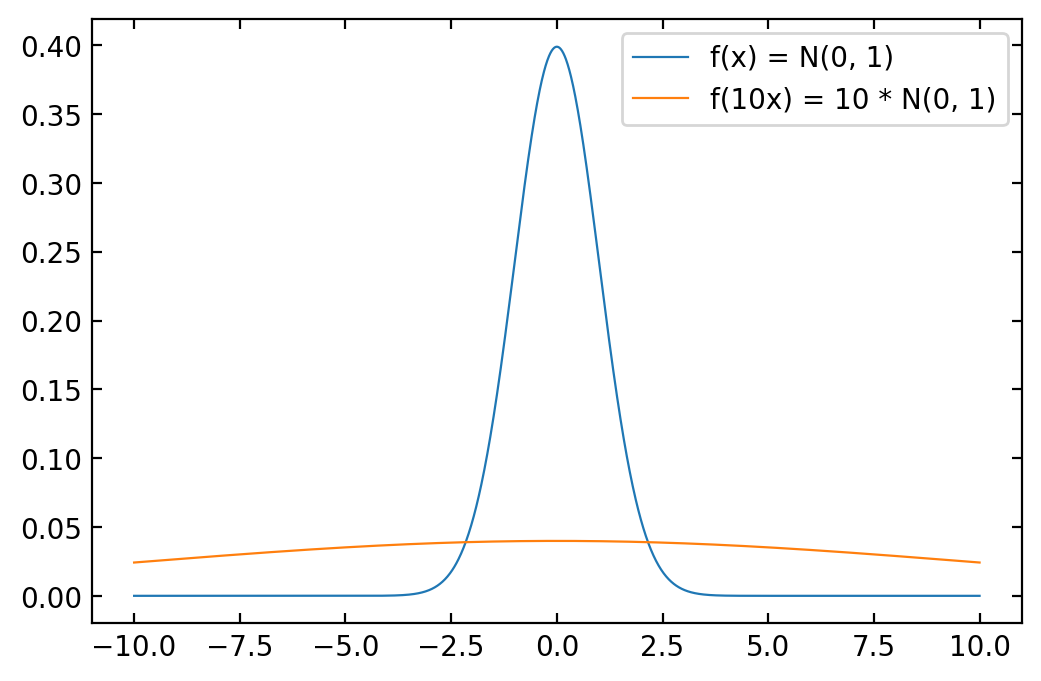

In [21]:
pi = norm(loc=0, scale=1)
test_x = np.linspace(-10, 10, 2000)
_, ax = plt.subplots()

ax.plot(test_x, pi.pdf(test_x), label="N(x | 0, 1)")
lbda, ndim = 0.1, 1
ax.plot(test_x, lbda**(ndim) * pi.pdf(test_x * lbda), label=" * N(10x | 0, 1)") # Is there an error in the paper? They have lbda**(-ndim)
#ax.plot(test_x, lbda**(ndim) * norm(loc=0, scale=0.1).pdf(test_x * lbda))

ax.legend()

# Fig 1

Text(-0.11,0.7,'cov:\n[[1.   0.57]\n [0.57 0.5 ]]')

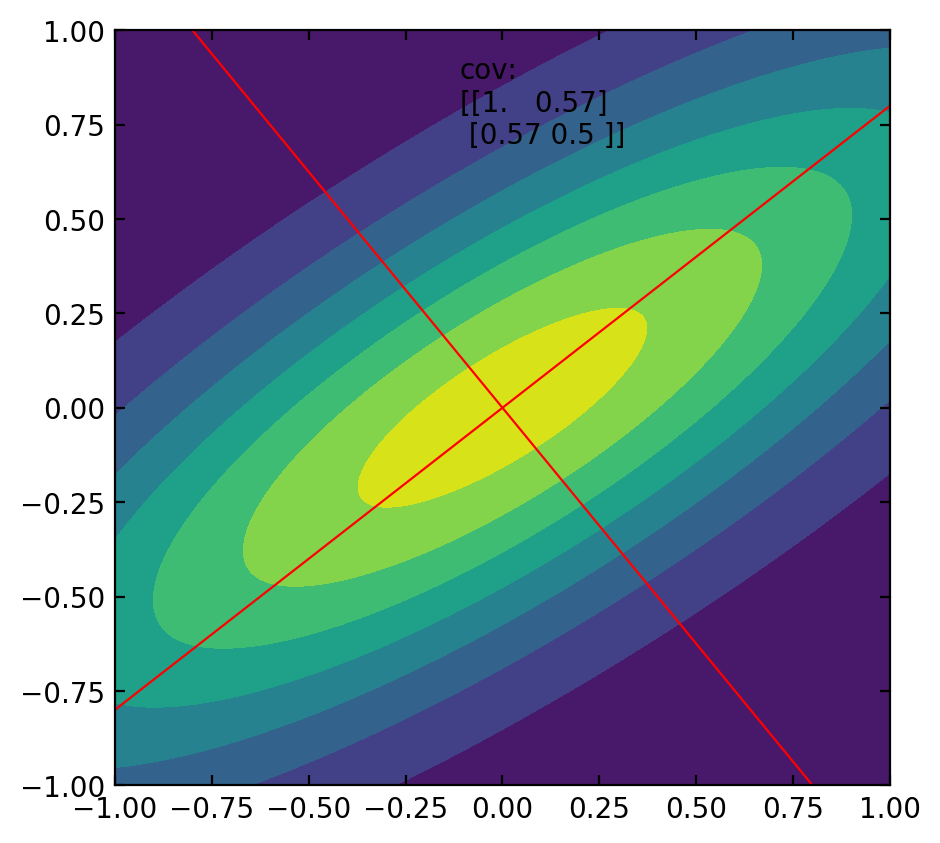

In [168]:
d = 1e-9
x, y = np.mgrid[-1:1+d:.01, -1:1+d:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0], pos[:, :, 1] = x, y

e = 0.5
max_cov = np.sqrt(1) * np.sqrt(1*e)
act_cov = 0.8*max_cov
cov_matrix = np.array([[1, act_cov], [act_cov, 1*e]])
corr_matrix = np.empty_like(cov_matrix)
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix[i])):
        corr_matrix[i][j] = cov_matrix[i][j] / np.sqrt(cov_matrix[i][i] * cov_matrix[j][j])

rv = multivariate_normal([0, 0], cov_matrix)
_, ax = plt.subplots(figsize=(5, 5))

ax.contourf(x, y, rv.pdf(pos))
ax.plot(x[:,0], corr_matrix[0][1]*x[:,0], color="red") # y = act_cov * x

ylim, xlim = ax.get_ylim(), ax.get_xlim()
ax.plot(x[:,0], -x[:,0]/corr_matrix[0][1], color="red")

ax.set(
    ylim=ylim, xlim=xlim,
)
np.set_printoptions(precision=2)
ax.annotate("cov:\n{}".format(cov_matrix), (-0.11, 0.7))

[(-1.0, 1.0), (-1.0, 1.0)]

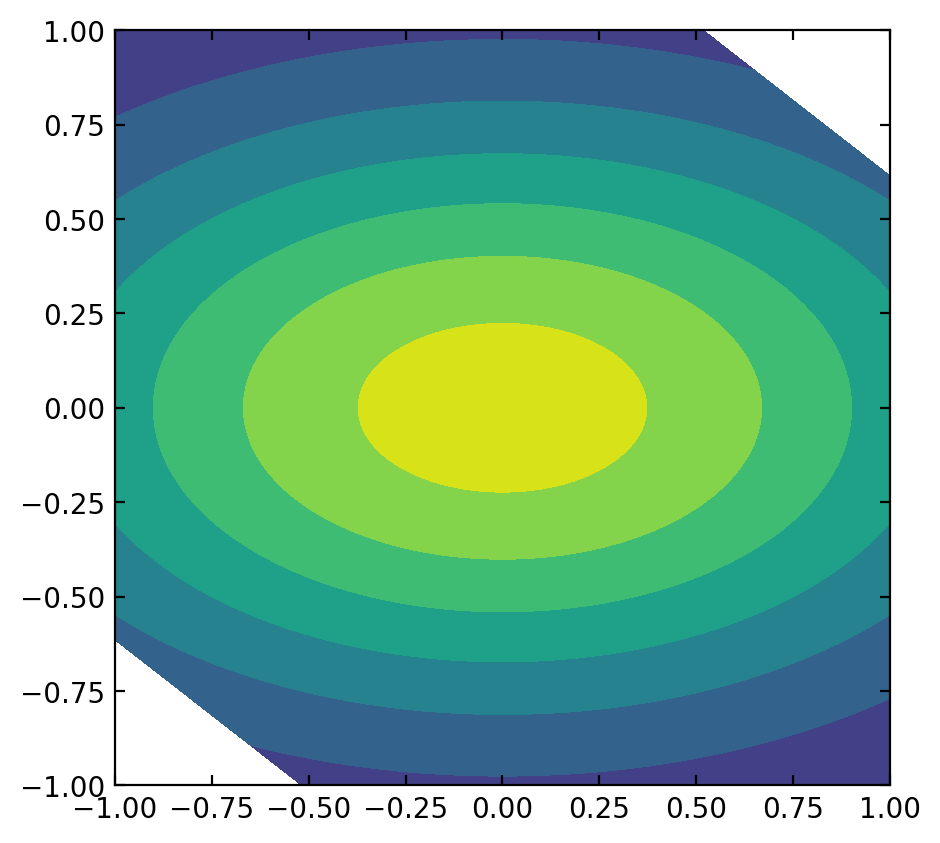

In [170]:
A_shape = np.array([[1, 0], [-act_cov, 1]])
A_size = np.array([[1, 0], [0, 1/np.sqrt(e)]])
pos_e = np.expand_dims(pos, 3)
posA = np.matmul(A_size, np.matmul(A_shape, pos_e))
x, y = np.squeeze(posA[:, :, 0]), np.squeeze(posA[:, :, 1])

_, ax = plt.subplots(figsize=(5, 5))
ax.contourf(x, y, rv.pdf(pos))

ax.set(
    ylim=ylim, xlim=xlim,
)